<a href="https://colab.research.google.com/github/EvM82/Machine-Learning-25/blob/main/exercise_ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_absolute_error
from itertools import product

## Install yfinance

In [2]:
!pip install yfinance


In [3]:
import yfinance as yf

ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period="5y").reset_index(drop=False)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,0,0.0,0.0
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,0,0.0,0.0
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,0,0.0,0.0
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,0,0.0,0.0
1256,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001,0,0.0,0.0


Αφαίρεση των Volume, Dividends, Stock Splits


In [4]:
df.drop(columns=['Volume', 'Dividends', 'Stock Splits'], inplace=True)
df

,Date,Open,High,Low,Close
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001
...,...,...,...,...,...
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003
1256,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001


## Ερώτημα 1

Δημιουργείται line plot με τις τιμές Open,High,Low,Close στον άξονα y και την ημερομηνια (Date) στον άξονα x με χρήση της plotly.

In [5]:
fig = px.line(df, x='Date', y=['Open', 'High', 'Low', 'Close'])
fig.show()

## Ερώτημα 2

Μία στατική χρονοσειρά έχει σταθερη συμπεριφορά στον χρόνο, πρόκειται για μία στοχαστική διαδικασία, της οποίας οι στατιστικές ιδιότητες της σειράς (πχ μέσος όρος ,διακύμανση, τυπική απόκλιση) δεν αλλάζουν με τον χρόνο. <br>
Μία στατική χρονοσειρά χαρακτηρίζεται δηλαδή από σταθερό μέσο όρο, variance και autocorrelation. To autocorrelation δείχνει πόσο σχετίζεται η τωρινή τιμή της μεταβλητής με τις προηγούμενες τιμές της στο χρόνο (lagged) και σε μία στατική χρονοσειρά παραμένει σταθερό. Η τιμή του μέσου όρου δείχνει γύρω από ποιά τιμή κινείται η χρονοσειρά, είναι δηλαδή η μέση τιμή ενώ η διακύμανση (variance) εκφράζει πόσο απέχουν οι τιμές από τον μέσο όρο. <br>
Σε μία μη στατική χρoνοσειρά, ο μέσος όρος δεν είναι σταθερός και ως αποτέλεσμα παρατηρούνται ανοδικές ή καθοδικές τάσεις (trend). Επίσης, μεταβαλλόμενα είναι η διακύμανση (δηλαδή αλλάζει η αστάθεια της χρονοσειράς στον χρόνο) και η αυτοσυσχέτιση (autocorrelation) (δηλαδή δεν υπάρχει σταθερή σχέση των τιμών του παρόντος με το παρελθόν), κάτι που σημαίνει ότι η πρόβλεψη των τιμών που θα πάρουν οι  μεταβλητές της χρονοσειράς δεν εύκολο να προβλεφθούν από μοντέλα. Επίσης σε μη στατικές χρονοσειρές αλλάζει και η εποχικότητα. Eποχικότητα σημαίνει ότι παρατηρείται ένα επαναλαμβανόμενο μοτίβο στη χρονοσειρά ανα συγκεκριμένα χρονικά διαστήματα, αλλά στις μη στατικές χρονοσειρές αυτό δεν είναι σταθερό.
<br>
Από το line plot του ερωτήματος 1 φαίνεται ότι δεν υπάρχει σταθερή διακύμανση, ενώ δεν υπάρχει σταθερός μέσος όρος, αφού σε κάποιες περιοχές υπάρχει ανοδική και σε άλλες καθοδική τάση. Οπότε πρόκειται για μη στατική χρονοσειρά, όπου τα δεδομένα αλλάζουν στον χρόνο και δεν υπάρχει σταθερότητα στον τρόπο εμφάνισης των τιμών της στον χρόνο.

## Ερώτημα 3

Το βασικότερο πρόβλημα είναι ότι εάν εκπαιδευτεί ένας regressor στα συγκεκριμένα δεδομένα, είναι η απρόβλεπτη πορεία των τιμών των δεδομένων, καθώς εφόσον πρόκειται για μη στατικές χρονοσειρές, οι τιμές που θα έρθουν στο μέλλον (άγνωστα δεδομένα) δεν χαρακτηρίζονται από ξεκάθαρα μοτίβα, ούτε κινούνται γύρω από ένα σταθερό μέσο όρο ή τυπική απόκλιση ή κάποιο άλλο στατιστικό χαρακτηριστικό. Αυτό καθιστά δύσκολη την πρόβλεψή τους, καθώς το regressor μοντέλο δεν μπορεί να εντοπίσει εύκολα κατά την εκπαίδευση σταθερές σχέσεις εισόδου-εξόδου των δεδομένων. Επίσης πέρα από την εύρεση σχέσης μεταξύ χαρακτηριστικών εισόδου και τιμής εξόδου υπάρχει επιπλέον και η επιρροή του χρόνου, του οποίου η συνεισφορά δεν είναι ξεκάθαρη. Δεν υπάρχει δηλαδή ξεκάθαρο χρονικό περιθώριο στο οποίο θα πρέπει να γίνει έλεγχος για εύρεση κάποιας συσχέτισης (δηλαδή σε τι βάθος χρόνου θα πρέπει αν γίνει αναζήτηση για επιρροή στην τιμή εξόδου). Όλα αυτά λοιπόν δυσκολεύουν ένα regressor στην εκπαίδευση του και στην ικανότητα γενίκευσής του.

## Ερώτημα 4

Παρακάτω απομωνόνεται (με χρήση mask) το διάστημα Ιουνίου-Ιουλίου, για να φανεί η τάση για τις μεταβλητές Open,High,Low,Close βάση του Date.

In [6]:
mask = (df['Date'] >= "2025-06-01") & (df['Date'] <= "2025-07-31")
df_subset = df.loc[mask]

fig = px.line(df_subset, x='Date', y=['Open', 'High', 'Low', 'Close'])
fig.show()

Για την τάση, μπορεί να παρατηρηθεί ότι η τελική θέση (31η Ιουλίου) έχει υψηλότερες τιμές (σε όλες τις μεταβλητές/χαρακτηριστικά) από την αρχική τιμή (1η Ιουνίου). Σε ένα διάστημα 22-29 Ιουνίου φαίνεται να έχει τη μεγαλύτερη κάθοδο ενώ στο διάστημα 29 Ιουνίου με 17 Ιουλίου και 24 Ιουλίου με 31 Ιουλίου τις πιο έντονες ανόδους. Γενικά πάντως, οι αυξομειώσεις δεν είναι ιδαίτερα έντονες, ούτε υπάρχει μία ξεκάθαρη τάση που θα μπορούσε να χαρακτηρίσει το διάστημα Ιουνίου-Ιουλίου 2025.
Τα γεγονότα εκείνης της περιόδου που ίσως επηρεάσαν την τάση μπορεί να είναι για την περίοδο 22-29 Ιουνίου η ανησυχία για πιθανή ύφεση στην οικονομία των ΗΠΑ (βάση ανακοίνωσης του Υπουργείου Εμπορίου για το ΑΕΠ) ενώ για την περίοδο 24-31 Ιουλίου μπορεί να υπήρξε άνοδος λόγω ισχυρών εταιρικών αποτελεσμάτων από εταιορείες όπως Meta και Microsof, που επηρέασαν την οικονομία και άρα και τις σχετικές κινήσεις.

## Ερώτημα 5

Δεν είναι δυνατόν να προβλέψουμε την τιμή (close) του δολαρίου για την επόμενη μέρα, αν έχουμε ως πληροφορία τα σημερινά open, high, low, close γιατί όπως αναφέρθηκε ήδη, οι σημερινές τιμές του δολαρίου της μεταβλητής Close, αλλά και των υπολοίπων χαρακτηριστικών, δεν εξαρτώνται μόνο από συγκεκριμένα χαρακτηριστικά ή από τις χθεσινές τιμές αλλά είναι συνδυασμός παραγόντων, στον οποίο σημαντικό ρόλο παίζει και η πάροδος του χρόνου. Συγκεκριμένα, θα χρειαστεί εξέταση σε βάθος χρόνου σίγουρα πέραν της μιας μέρας προκειμένου να βρεθεί μία πιθανή σε σχέση ανάμεσα σε προηγούμενες τιμές και σημερινή τιμή εξόδου. Επομένως, εάν γνωρίζουμε μόνο τις χθεσινές τιμές, ακόμη και αν είναι για όλες τις μεταβλητές, δεν μπορούμε να προβλέψουμε με ακρίβεια την τιμή επόμενης ημέρας εφόσον δεν υπάρχει κάποια σταθερή σχέση που θα μπορούσε να χρησιμοποιηθεί για την εύρεσή της. Επίσης, οι τιμές επηρεάζονται και από απρόβλεπτα γεγονότα που μπορεί να συμβούν εκείνη την μέρα, οπότε ακόμα κι αν είχε βρεθεί κάποια σχέση, τέτοια γεγονότα θα έδιναν άλλες τιμές από τις αναμενόμενες.

## Ερώτημα 6

Σε περιπτώσεις χρονοσειρών, όπως αυτή αυτής της άσκησης, δεν έχει νόημα ο τυχαίος διαχωρισμός των δεδομένων σε train-test. Στις χρονοσειρές κύριο χαρακτηριστικό είναι η επιρροή του χρόνου στις μεταβλητές και πώς παροντικές τιμές εξαρτώνται από παλαιότερες τιμές. Τα χαρακτηριστικά δηλαδή των δεδομένων, μελετώνται σε σχέση με την πάροδο του χρόνου, και οι τιμές του παρελθόντος συνήθως έχουν πληροφορία για τις τιμές που πρόκειται να έρθουν. Εάν πραγματοποιηθεί τυχαίος διαχωρισμός των δεδομένων σε train-test, αυτή η χρονική πληροφορία χάνεται καθώς τα δεδομένα θα αναμειχτούν. Αυτό θα έχει σαν αποτέλεσμα να χαθεί η πληροφορία του πώς μεταβάλλονται οι τιμές στην πάροδο του χρόνου και άρα αγνοείται έτσι μια σχέση που μπορεί να υπάρχει και να χρησιμοποιηθεί στην πρόβλεψη τιμών. Επίσης αν συμπεριφερθούμε στα train, test σαν χρονοσειρές ενώ έχει γίνει τυχαίος διαχωρισμός, καταστρέφονται οι σχέσεις των δεομένων και εκπαιδεύουμε μοντέλο σε σχέσεις μεταξύ μεταβλητών ανά τον χρόνο οι οποίες όμως δεν ισχύουν.

## Ερώτημα 7

Χώρισε σε train-test με test μόνο του 2025 και train τις προηγούμενες χρονιές.
Στη μάσκα θα είναι True οι θέσεις όπου το Date είναι μέχρι και την ημερομηνία που δώθηκε. Στο train θα κρατηθούν οι True αυτές τιμές ενώ στο test θα κρατηθούν οι τιμές που έχουν False στην μάσκα.

In [7]:
mask = df['Date'] <= "2024-12-31"

train = df.loc[mask]
test  = df.loc[~mask]


Αφαίρεση στήλης Date

In [8]:
train = train.drop(columns=['Date'])
test  = test.drop(columns=['Date'])

print("train\n")
print(train.head())
print("\ntest\n")
print(test.head())

train

        Open       High        Low      Close
0  93.339996  93.550003  92.489998  92.529999
1  92.570000  92.820000  92.180000  92.230003
2  92.239998  92.959999  92.129997  92.730003
3  92.760002  92.970001  92.599998  92.750000
4  92.699997  93.209999  92.610001  93.040001

test

            Open        High         Low       Close
1044  108.529999  109.529999  108.269997  109.389999
1045  109.199997  109.220001  108.900002  108.949997
1046  108.919998  109.070000  107.750000  108.260002
1047  108.339996  108.699997  107.849998  108.540001
1048  108.620003  109.379997  108.550003  109.089996


## Ερώτημα 8

Στη συνάρτηση, θα τρέξει ενα loop μέχρι το μήκος του dataframe μείον το Ν. Αυτό  γίνεται γιατί για τα Ν τελευταία δείγματα, δεν υπάρχουν μελλοντικές τιμές προς πρόβλεψη, ενώ από εκείνο το σημείο και μετά δεν υπάρχουν και αρκετές γραμμές για να σχηματιστεί πλήρες παράθυρο μήκους Ν και η αντίστοιχη τιμή-στόχος.<br>
Στη λίστα x για κάθε επανάληψη παίρνει Ν γραμμές μετρώντας ως πρώτη την i-οστή και τις προσθέτει στη λίστα x με την μορφή numpy arrays (χρήση .values για τις τμές των Ν γραμμών). Δημιουργείται δηλαδή με τη .values, numpy array με Ν γραμμές και 4 στήλες (open,high,low,close), όπου κάθε στηλη εχει την αντιστοιχη τιμη απο το dataframe για κάθε στοιχείο της λίστας x.<br>
Στο τέλος του loop, έχει γίνει η λίστα x, η οποία θα περιέχει σε κάθε κελί της numpy array με Ν καταγραφές (γραμμές του αρχικού dataframe).<br>
Μετά, χρησιμοποιώντας την εντολή shift(-N), μετακινώ τη στήλη close, η οποία έχει και τις target τιμές, κατά Ν γραμμές πάνω. Έτσι, για κάθε παράθυρο του x μήκους Ν που παίρνω μέσα στο loop, το αντίστοιχο target (y) είναι η τιμή close που βρίσκεται ακριβώς μετά το τέλος του παραθύρου (στη θέση N+1 σε σχέση με την αρχή του).<br>
Η μετακίνηση αυτή κατά Ν, δημιουργεί κάποιες κενές τιμές στο τέλος του y, τις οποίες διαγράφω (dropna()). Με αυτόν τον τρόπο τα x,y έχουν ίδιο μήκος, καθώς το x (και το y μετά τη διαγραφή των κενών τιμών) έχει μήκος ίσο με το αρχικό μήκος του dataframe μείον Ν, όπως εξηγήθηκε πιο πάνω.
Τέλος γίνεται η μετατροπή των x,y σε numpy arrays.

In [9]:
def window(df,N):
  x=[]
  y=[]

  for i in range(len(df)-N):

      x.append(df.iloc[i : i+N].values)

  y=df['Close'].shift(-N)
  y = y.dropna().values

  x=np.array(x)
  y=np.array(y)

  return x,y



## Ερώτημα 9

Το μέγεθος του παραθύρου και άρα το πόσο στο παρελθόν υπάρχει πληροφορία που μπορεί να χρησιμοποιηθεί για εύρεση της τιμής στόχο στο παρόν, εξαρτάται κυρίως από το είδος της χρονοσειράς και από το τι δεδομένα περιέχει (πχ καρδιογράφημα ή τιμές δολαρίου). Μία λύση είναι να χρησιμοποιηθούν διαφορετικά μήκη παραθύρου για να βρεθεί το καταλληλότερο (πχ Ν=[3,5,7,20,50] και δοκιμάζ τιμές ανάλογα της απόδοσης που δίνει το μοντέλο). Γενικά, εάν στόχος είναι η εύρεση της επόμενης μέρας σε σύγκριση με στόχο την έυρεση σε πιο μακρινό ορίζοντα (πχ ένα μήνα), τότε στην περίπτωση πρόβλεψης για επόμενη μέρα θα χρειαστεί λογικά μικρότερο μήκος παραθύρου καθώς όσο μακρινές τιμές θέλω να προβλέψω, τόσο μεγαλύτερο βάθος χρόνου από το παρελθόν θα χρειαστει να χρησιμοποιήθεί.

## Ερώτημα 10

Δημιουργία των x_train,y_train,x_test, y_test από τα train, test χρησιμοποιώντας την συνάρτηση window() για N=5.

In [10]:
N=5
x_train,y_train=window(train,N)
x_test,y_test=window(test,N)


x_train = x_train.reshape(x_train.shape[0], -1)
x_test  = x_test.reshape(x_test.shape[0], -1)

Παρακάτω φαίνεται ότι το shape τω x_train,y_train,x_test,y_test καθώς και τυπώνεται το 1ο input του x_train για επιβεβαίωση ότι η προεπεξεργασία των δεδομένων έχει την μορφή που θέλουμε. <br>Βλέπουμε ότι κάθε δείγμα είναι ένα διάνυσμα μεγέθους 20 και τα μήκη τους είναι 1024 για τα inputs και outputs (x,y) του train και 206 για  τα inputs και outputs (x,y) του test.

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[0])

(1039, 20)
(1039,)
(209, 20)
(209,)
[93.33999634 93.55000305 92.48999786 92.52999878 92.56999969 92.81999969
 92.18000031 92.23000336 92.23999786 92.95999908 92.12999725 92.73000336
 92.76000214 92.97000122 92.59999847 92.75       92.69999695 93.20999908
 92.61000061 93.04000092]


## Ερώτημα 11

**Linear Regression**

Το μοντέλο Γραμμικής Παλινδρόμησης (Linear Regression) θεωρεί ότι υπάρχει μια γραμμική σχέση μεταξύ εισόδων (x) και εξόδων (y) την οποία προσπαθεί να βρει τροποποιώντας τις παραμέτρους(βάρη), στοχεύοντας κάθε αλλαγή στα βάρη να ελαχιστοποιήσει τη συνάρτηση σφάλματος. Εδώ x είναι οι παρελθοντικές τιμές της χρονοσειράς και y η τιμή που πρέπει να προβλέψει.

In [42]:
mae_m=[]
reg = LinearRegression().fit(x_train, y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

mae_m.append({"Model": "LinearRegression", "MAE_test": mean_absolute_error(y_test, y_pred_test),"MAE_train": mean_absolute_error(y_train, y_pred_train)})


**Random Forest**

Το Random Forest χρησιμοποιεί πολλά Decision Trees, που εκπαιδεύει σε υποσύνολα του αρχικού συνόλου εκπαίδευσης τα οποία έχουν προκύψει από τυχαία δειγματοληψία (bootstrap sampling). Ως αποτέλεσμα το κάθε δέντρο θα δίνει σημασία σε άλλα χαρακτηριστικά. Το τελικό αποτέλεσμα προκύπτει από τον μέσο όρο των προβλέψεων που θα δώσει το κάθε decision tree

Στο Random Forest, μπορύν να οριστούν διάφορες παράμετροι που επηρεάζουν την εκπαίδευση του μοντέλου, όπως το μέγιστο βλαθος. Οπότε χρησιμοποιείται η συνάρτηση product για να δοκιμαστούν κάποιοι πιθανοί συνδυασμοί. Στα criteria αφήνεται μόνο το absolute error γιατί αυτό στοχεύει στην ελαχιστοποίηση του ΜΑΕ. Για κάθε έναν από αυτούς υπολογίζεται train MAE και test MAE και στη συνέχεια, βρίσκεται ο συνδυασμός που έδωσε υψηλότερο test MAE, και αυτός κρατήται.

In [43]:
criteria = [ "absolute_error"]
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features_list = ["sqrt", "log2"]
ccp_alphas = [0.0, 0.01]

results = []

for crit, depth, split, leaf, feat, alpha in product(
    criteria, max_depths, min_samples_splits, min_samples_leafs, max_features_list, ccp_alphas
):
    regr_2 = RandomForestRegressor(
        criterion=crit,
        max_depth=depth,
        min_samples_split=split,
        min_samples_leaf=leaf,
        max_features=feat,
        ccp_alpha=alpha,
        random_state=0
    ).fit(x_train, y_train)

    y_pred_train = regr_2.predict(x_train)
    y_pred_test  = regr_2.predict(x_test)

    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae  = mean_absolute_error(y_test, y_pred_test)

    results.append({
        'criterion': crit,
        'max_depth': depth,
        'min_samples_split': split,
        'min_samples_leaf': leaf,
        'max_features': feat,
        'ccp_alpha': alpha,
        'train_mae': train_mae,
        'test_mae': test_mae
    })

results_df = pd.DataFrame(results)
print(results_df.head())


        criterion  max_depth  min_samples_split  min_samples_leaf  \
0  absolute_error        NaN                  2                 1   
1  absolute_error        NaN                  2                 1   
2  absolute_error        NaN                  2                 1   
3  absolute_error        NaN                  2                 1   
4  absolute_error        NaN                  2                 2   

  max_features  ccp_alpha  train_mae  test_mae  
0         sqrt       0.00   0.143201  0.512507  
1         sqrt       0.01   0.362074  0.532296  
2         log2       0.00   0.143201  0.512507  
3         log2       0.01   0.362074  0.532296  
4         sqrt       0.00   0.217176  0.518371  


In [44]:
best_row = results_df.loc[results_df['test_mae'].idxmax()]
print(best_row)

criterion            absolute_error
max_depth                       3.0
min_samples_split                 2
min_samples_leaf                  2
max_features                   sqrt
ccp_alpha                       0.0
train_mae                  0.536754
test_mae                   1.643668
Name: 20, dtype: object


Για το  μεγαλύτερα test mae, θα εκπαιδεύσω μοντέλο και αυτό θα κρατήσω.

In [45]:
regr_2 = RandomForestRegressor(
        criterion='absolute_error',
        max_depth=3,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features='sqrt',
        ccp_alpha=0,
        random_state=0
    ).fit(x_train, y_train)


y_pred_train=regr_2.predict(x_train)
y_pred_test=regr_2.predict(x_test)

mae_m.append({"Model": "RandomForest", "MAE_test": mean_absolute_error(y_test, y_pred_test),"MAE_train": mean_absolute_error(y_train, y_pred_train)})


**Bagging**

Στο Bagging χρησιμοποιούνται τυχαία υποσύνολα του αρχικού συνόλου εκπαίδευσης (train set) σε ταξινομητές που χρησιμοποιούν τον ίδιο αλγόριθμο (εδώ LinearRegression). Η τελική πρόβλεψη είναι η μέση τιμή των προβλέψεων.

Ομοίως και εδώ υπάρχουν κάποιες παράμετροι για τις οποίες θα δοκιμαστούν συνδυασμοί και θα κρατηθεί όποιος δώσει υψηλότερο test MAE.

In [46]:
n_estimators_list = [10, 50, 100]
max_samples_list = [0.5, 1.0]
max_features_list = [0.5, 1.0]

results = []

for n_est, max_s, max_f in product(n_estimators_list, max_samples_list, max_features_list):
    bag = BaggingRegressor(
        estimator=LinearRegression(),
        n_estimators=n_est,
        max_samples=max_s,
        max_features=max_f,
        random_state=0
    ).fit(x_train, y_train)


    y_pred_train = bag.predict(x_train)
    y_pred_test  = bag.predict(x_test)

    results.append({
        "n_estimators": n_est,
        "max_samples": max_s,
        "max_features": max_f,
        "train_mae": mean_absolute_error(y_train, y_pred_train),
        "test_mae": mean_absolute_error(y_test, y_pred_test)
    })

results_df = pd.DataFrame(results)
print(results_df)


    n_estimators  max_samples  max_features  train_mae  test_mae
0             10          0.5           0.5   0.339643  0.389630
1             10          0.5           1.0   0.330457  0.397433
2             10          1.0           0.5   0.339387  0.388050
3             10          1.0           1.0   0.329649  0.391202
4             50          0.5           0.5   0.338212  0.383677
5             50          0.5           1.0   0.329141  0.393451
6             50          1.0           0.5   0.337777  0.383024
7             50          1.0           1.0   0.329280  0.393374
8            100          0.5           0.5   0.343290  0.382892
9            100          0.5           1.0   0.328885  0.391893
10           100          1.0           0.5   0.343297  0.383199
11           100          1.0           1.0   0.329147  0.392396


In [48]:
best_row = results_df.loc[results_df['test_mae'].idxmax()]
print(best_row)

n_estimators    10.000000
max_samples      0.500000
max_features     1.000000
train_mae        0.330457
test_mae         0.397433
Name: 1, dtype: float64


In [49]:
bag = BaggingRegressor(
        estimator=LinearRegression(),
        n_estimators=10,
        max_samples=0.5,
        max_features=1,
        random_state=0
    ).fit(x_train, y_train)

y_pred_train = bag.predict(x_train)
y_pred_test  = bag.predict(x_test)

mae_m.append({"Model": "BaggingRegressor", "MAE_test": mean_absolute_error(y_test, y_pred_test),"MAE_train": mean_absolute_error(y_train, y_pred_train)})


**XGBoost**

Το XGBoost είναι αλγόριθμος Gradient Boosting. Εκπαιδεύει διαδοχικά δέντρα σε όλο το training set και το κάθε μοντέλο προσπαθεί να προβλέψει τα λάθη του προηγούμενου μοντέλου.  Το τελικό αποτέλεσμα είναι το άθροισμα των προβλέψεων όλων των μοντέλων που δημιουργήθηκαν μαζί με τα βάρη τους.

Και εδώ υπάρχουν θα δοκιμαστούν συνδυασμοί γαι διαφορετικές τιμές παραμέτρων και θα κρατηθεί όποιος δώσει υψηλότερο test MAE.

In [50]:
n_estimators_list = [100, 300]
max_depths = [3, 5]
learning_rates = [0.05, 0.1]
subsamples = [0.8, 1.0]

results = []

for n_est, depth, lr, subs in product(n_estimators_list, max_depths, learning_rates, subsamples):
    model = XGBRegressor(
        n_estimators=n_est,
        max_depth=depth,
        learning_rate=lr,
        subsample=subs,
        random_state=0,
        n_jobs=-1
    ).fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test  = model.predict(x_test)

    results.append({
        "n_estimators": n_est,
        "max_depth": depth,
        "learning_rate": lr,
        "subsample": subs,
        "train_mae": mean_absolute_error(y_train, y_pred_train),
        "test_mae": mean_absolute_error(y_test, y_pred_test)
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values("test_mae").head())


    n_estimators  max_depth  learning_rate  subsample  train_mae  test_mae
1            100          3           0.05        1.0   0.292711  0.423810
9            300          3           0.05        1.0   0.236061  0.423932
3            100          3           0.10        1.0   0.260152  0.430588
11           300          3           0.10        1.0   0.180099  0.442731
6            100          5           0.10        0.8   0.176898  0.445878


In [51]:
best_row = results_df.loc[results_df['test_mae'].idxmax()]
print(best_row)

n_estimators     300.000000
max_depth          5.000000
learning_rate      0.100000
subsample          1.000000
train_mae          0.075030
test_mae           0.486107
Name: 15, dtype: float64


In [52]:
model = XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=1,
    random_state=0,
    n_jobs=-1
).fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test  = model.predict(x_test)

mae_m.append({"Model": "XGBRegressor", "MAE_test": mean_absolute_error(y_test, y_pred_test),"MAE_train": mean_absolute_error(y_train, y_pred_train)})

**Stacking**

Στο Stacking γίνεται συνδυασμός μοντέλων που χρησιμοποιούν διαφορετικούς αλγοριθμους. Κάθε μοντέλο παίρνει σαν χαρακτηριστικά τις προβλέψεις των μοντέλων του προηγούμενου επιπεδου και προσπαθεί από αυτές να προβλέψει την y (target). Το τελικό αποτέλεσμα είναι ο συνδυασμός των μοντέλων αυτών και θα δίνει ένα αποτελεσμα/μια πρόβλεψη που θα έχει χρησιμοποιήσει τις προβλέψεις των προηγούμενων μοντέλων.

regr_2 = RandomForestRegressor(
        criterion='absolute_error',
        max_depth=3,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features='sqrt',
        ccp_alpha=0,
        random_state=0
    ).fit(x_train, y_train)

In [53]:
estimators = [
    ('lr', LinearRegression()),
    ('rf', RandomForestRegressor()),
]

reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,random_state=42)
)

reg.fit(x_train, y_train)

y_pred_train = reg.predict(x_train)
y_pred_test  = reg.predict(x_test)

mae_m.append({"Model": "StackingRegressor", "MAE_test": mean_absolute_error(y_test, y_pred_test),"MAE_train": mean_absolute_error(y_train, y_pred_train)})


Παρακάτω φαίνεται ο πίνακας με τα μοντέλα και το MAE τους.

In [54]:
f_mae = pd.DataFrame(mae_m)
f_mae

,Model,MAE_test,MAE_train
0,LinearRegression,0.391180,0.329447
1,RandomForest,1.643668,0.536754
2,BaggingRegressor,0.494276,0.464778
3,XGBRegressor,0.486107,0.075030
4,StackingRegressor,0.463230,0.376423


Bar PLot

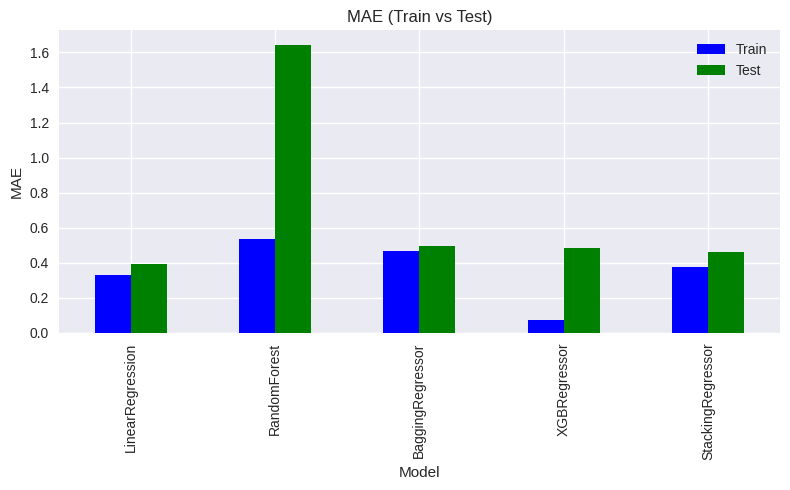

In [55]:
plt.style.use("seaborn-v0_8")
ax = f_mae.plot(
    x="Model",
    y=["MAE_train", "MAE_test"],
    kind="bar",
    color=["blue", "green"],
    figsize=(8, 5)
)
plt.ylabel("MAE")
plt.title("MAE (Train vs Test)")
plt.legend(["Train", "Test"])
plt.tight_layout()
plt.show()


Παρατηρώ ότι μικρότερες τιμές στο test mae έχει το Linear Regression, ενώ το Random Forest έχει τις υψηλότερες. Στο Random Forest επίσης, παρατηρείται η μεγαλύτερη διαφορά ανάμεσα σε train και test, με το test να πετυχαίνει υψηλότερο ΜΑΕ, καθώς και στο XGBoost παρατηρείται διαφορά ανάμεσα στις τιμές ΜΑΕ των test και train. Αυτή η διαφορά, μπορεί να αποτελεί ένδειξη υπερπροσαρμογής (overfitting) του μοντέλου. Γενικά, όσο χαμηλότερη η τιμή σφάλματος ΜΑΕ, τόσο καλύτερη απόδοση στα δεδομένα είχε το μοντέλο. Καλύτερη απόδση λοιπόν φαίνεται να έχουν το Linear Regression, μετά το Bgging και το Stacking, τα οποία είναι σε κοντινές τιμές. Το XGBoost είναι επίσης κοντά σαν τιμή αλλά έχει σημαντική διαφορά μεταξύ mae train και mae test όπως ήδη ειπώθηκε.

(Η εξήγηση σε 1-2 γραμμές για τον τρόπο λειτουργίας του κάθε μοντέλου έγινε παραπάνω στο σημείο που εκπαιδευτηκε το κάθε μοντέλο)

## Ερώτημα 12

a)

Η πρσθήκη του μήνα πιθανώς να συμβάλλει στη βελτίωση των προβλέψεων γιατί προσθέτει επιπλέον χρονική πληροφορία σε βάθους χρόνου ως προς μήνα. Προστίθεται δηλαδή μια επιπλέον πληροφορία και που σχετίζει τιμές με τον μήνα.

In [56]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df

,Date,Open,High,Low,Close,Day,Month
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,5,11
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,6,11
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,9,11
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,10,11
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,11,11
...,...,...,...,...,...,...,...
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,30,10
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,31,10
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,3,11
1256,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001,4,11


b)

Ο κώδικας εφαρμόζει τη φόρμουλα των Λογαριθμικών Επιστροφών (Log Returns) στο df dataframe και άρα για κάθε τιμή των δεδομένων παίρνω πληροφορία για τη μεταβολή της τιμής την επόμενη μέρα.

In [57]:
df_log_returns = df.copy()
for col in ['Open', 'High', 'Low', 'Close']:
    df_log_returns[col] = np.log(1 + df_log_returns[col].pct_change())
df_log_returns

,Date,Open,High,Low,Close,Day,Month
0,2020-11-05 00:00:00-05:00,NaN,NaN,NaN,NaN,5,11
1,2020-11-06 00:00:00-05:00,-0.008284,-0.007834,-0.003357,-0.003247,6,11
2,2020-11-09 00:00:00-05:00,-0.003571,0.001507,-0.000543,0.005407,9,11
3,2020-11-10 00:00:00-05:00,0.005622,0.000108,0.005089,0.000216,10,11
4,2020-11-11 00:00:00-05:00,-0.000647,0.002578,0.000108,0.003122,11,11
...,...,...,...,...,...,...,...
1253,2025-10-30 00:00:00-04:00,0.004043,0.003617,0.003037,0.003119,30,10
1254,2025-10-31 00:00:00-04:00,0.003524,0.001203,0.005042,0.002709,31,10
1255,2025-11-03 00:00:00-05:00,0.002610,0.001501,0.002913,0.000701,3,11
1256,2025-11-04 00:00:00-05:00,0.002303,0.002697,0.000301,0.003498,4,11


c) ιστόγραμμα

Παρακάτω γίνονται τα ιστογράμματα για τα δεδομένα πριν και μετα τη χρήση της φόρμουλας των Λογαριθμικών Επιστροφών (Log Returns). Παρατηρούμε ότι για τις μεταβλητές Open, High, Close, Low πριν τη χρήση της φόρμουλας η κατανομή τους είναι πιο ακαθόριστη, ενώ η κατανομή μετά τη φόρμουλα μοιάζει με τη κανονική κτανομή, η οποία διευκολύνει τςι προβλέψεις των μοντέλων. <br>
Η φόρμουλα των Λογαριθμικών Επιστροφών (Log Returns), ενδεχομένως θα βελτιώσει τις προβλέψεις των μοντέλων διότι η χρήση λογαρίθμου, εξομαλύνει τα εύρη τιμών, μειώνοντας έτσι και την επίδραση των outliers, και φέρνει την κατανομή των δεοδμένων σε μορφή σαν της κανονικής.

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'Month'}>, <Axes: >, <Axes: >]],
      dtype=object)

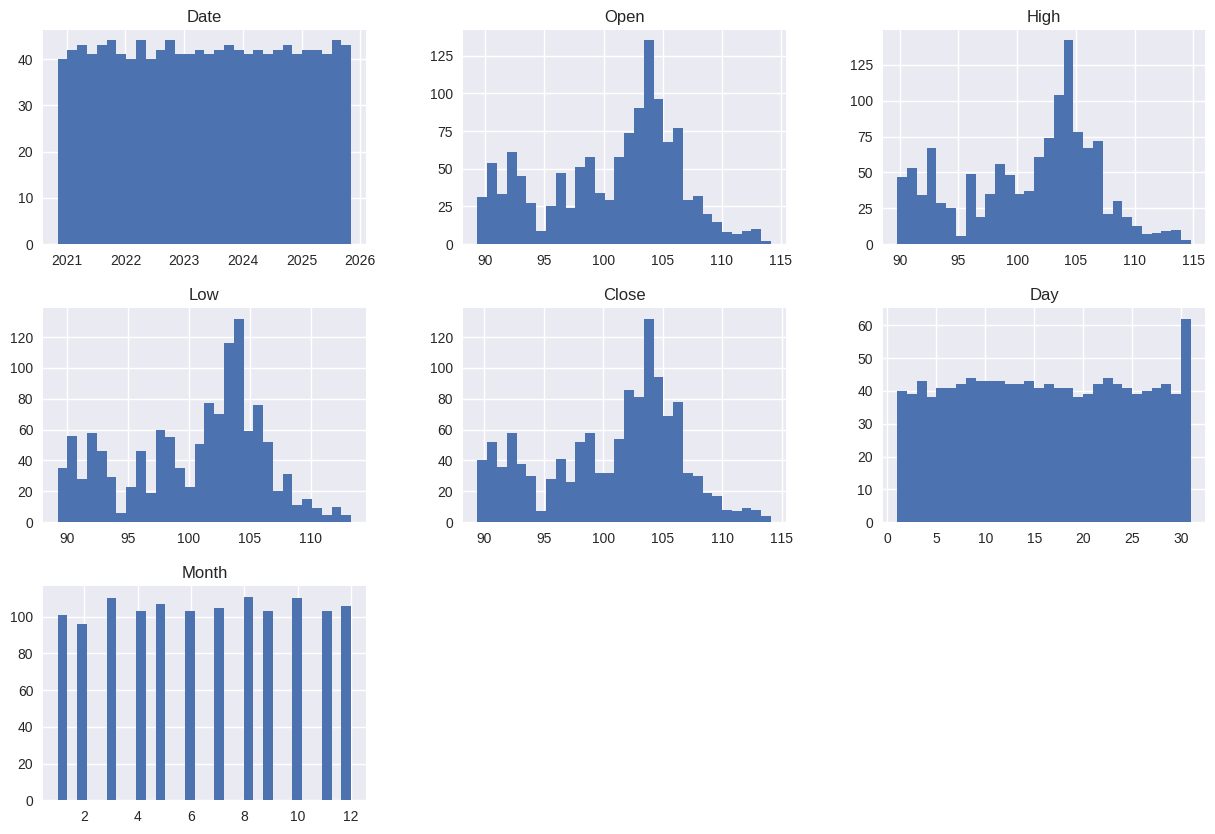

In [59]:
clm=list(df.columns)
df.hist(column=clm,figsize=(15, 10), bins=30)

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Day'}>],
       [<Axes: title={'center': 'Month'}>, <Axes: >, <Axes: >]],
      dtype=object)

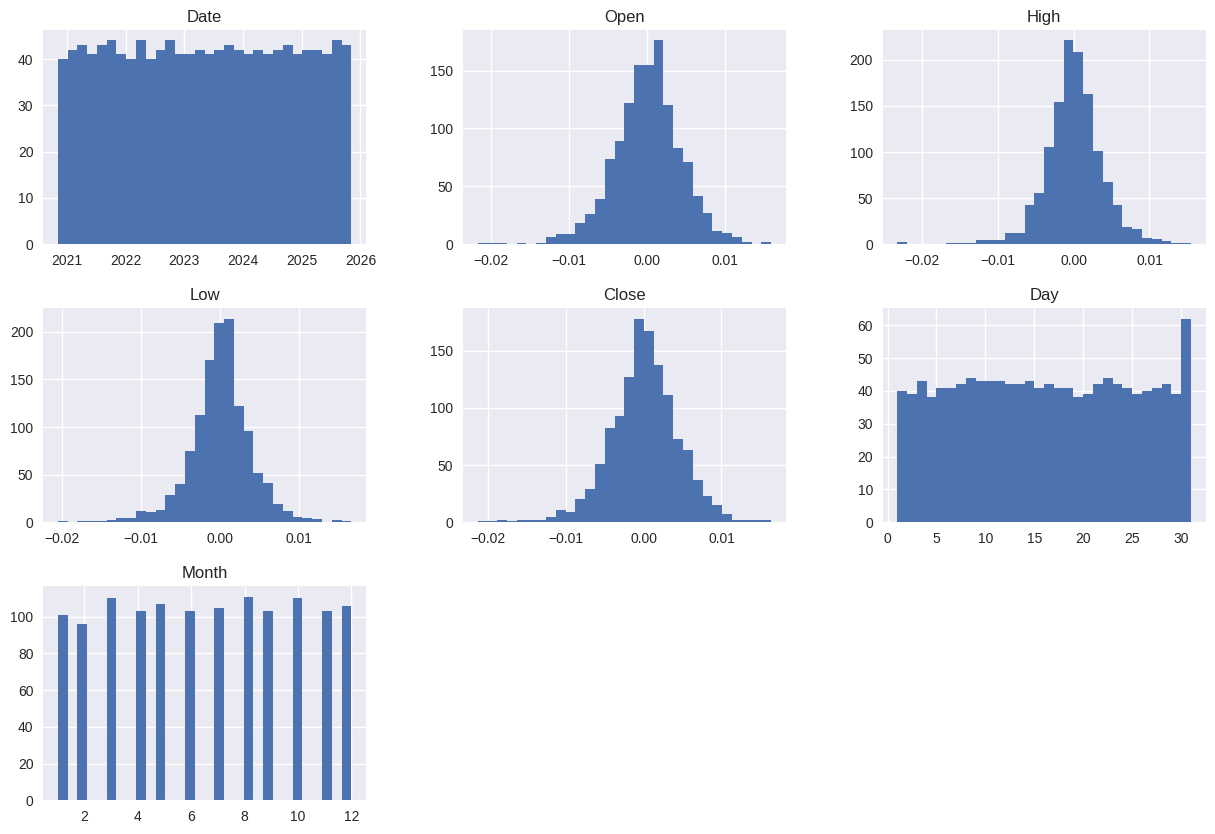

In [61]:
clm=list(df_log_returns.columns)
df_log_returns.hist(column=clm,figsize=(15, 10), bins=30)

d)

Εάν κάποιο μοντέλο προβλέψει 0.01, αυτό σημαίνει ότι υπάρχει αύξηση (αφού είναι θετική η τιμή) 1% στην τιμή σε σχέση με την προηγούμενη τιμή της μεταβλητής Close.
  <br>
  Βάση του τύπου μπορεί να υπολογισθεί η τιμή του $c_{t}$.   <br>

$r_{t} = \ln(\frac{c_{t+1}}{c_{t}})$ =>  ,όπου $r_{t} = 0.01 $ και $c_{t}=0.95$<br>

=> $e^{(r_{t})} = \frac{c_{t+1}}{c_{t}}$ => <br>

=> $c_{t+1} = c_{t}e^{(r_{t})}$ => <br>

=> $c_{t+1} = 0.95 e^{(0.01)}$  => <br>

=> $c_{t+1} = 0.96$



## Ερώτημα 13

Από τα μοντέλα του Ερωτήματος 11, καλύτερο ήταν το Linear Regression.

Εφόσον εχω το df_log_returns, θα ξαναεπανλάβω τη διαδικασία δημιουργίας x train, y train, x test, y test.

Επίσης, η χρήση της φόρμουλας, είχε ως αποτέλεσμα οι πρώτη σειρά να έχει κενές τιμές, άρα απ΄το train θα αφαιρέσω τα κενά (για αν είναι σίγουρο ότι δεν υπάρχυν κενές τιμές πουθενά εφαρμόζεται το dropna σε όλα).



In [73]:
df_log_returns = df_log_returns.dropna()

In [74]:
mask = df_log_returns['Date'] <= "2024-12-31"

train = df_log_returns.loc[mask]
test  = df_log_returns.loc[~mask]


In [75]:
train = train.drop(columns=['Date'])
test  = test.drop(columns=['Date'])


print("train\n")
print(train.head())
print("\ntest\n")
print(test.head())

train

       Open      High       Low     Close  Day  Month
1 -0.008284 -0.007834 -0.003357 -0.003247    6     11
2 -0.003571  0.001507 -0.000543  0.005407    9     11
3  0.005622  0.000108  0.005089  0.000216   10     11
4 -0.000647  0.002578  0.000108  0.003122   11     11
5  0.003339 -0.000751  0.001834 -0.000860   12     11

test

          Open      High       Low     Close  Day  Month
1044  0.004062  0.008711  0.003701  0.008261    2      1
1045  0.006154 -0.002834  0.005802 -0.004030    3      1
1046 -0.002567 -0.001374 -0.010616 -0.006353    6      1
1047 -0.005339 -0.003398  0.000928  0.002583    7      1
1048  0.002581  0.006236  0.006470  0.005054    8      1


In [76]:
N=5
x_train,y_train=window(train,N)
x_test,y_test=window(test,N)


x_train = x_train.reshape(x_train.shape[0], -1)
x_test  = x_test.reshape(x_test.shape[0], -1)

Εφόσον έχω επιπλέον 2 στήλες (Day, Month), αλλάζει το μέγεθος και από 20 (4-στήλες- επί 5) γίνεται 30 (6 -στήλες- επί 5). Το πλήθος γραμμών παραμένει ίδιο (με εξαίρεση την αφαίρεησ της 1ης γραμμής που είχε κενές τιμές απο το train).

In [78]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train[0])

(1038, 30)
(1038,)
(209, 30)
(209,)
[-8.28358951e-03 -7.83395482e-03 -3.35731687e-03 -3.24740942e-03
  6.00000000e+00  1.10000000e+01 -3.57125898e-03  1.50715273e-03
 -5.42597294e-04  5.40658737e-03  9.00000000e+00  1.10000000e+01
  5.62168262e-03  1.07590343e-04  5.08853187e-03  2.15620474e-04
  1.00000000e+01  1.10000000e+01 -6.47095766e-04  2.57812865e-03
  1.08008599e-04  3.12181656e-03  1.10000000e+01  1.10000000e+01
  3.33859757e-03 -7.51271250e-04  1.83395239e-03 -8.60234796e-04
  1.20000000e+01  1.10000000e+01]


Το Linear Regression μοντέλο

In [90]:
reg = LinearRegression().fit(x_train, y_train)

y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

print( "MAE_test", mean_absolute_error(y_test, y_pred_test),"MAE_train", mean_absolute_error(y_train, y_pred_train))


MAE_test 0.003861147994158097 MAE_train 0.003237715092117276
